### Librerias y Dataset

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("empanadas_don_pedro.csv")
pd.set_option("display.max_columns",None)

In [9]:
df.shape

(500, 10)

In [10]:
df.head()

,fecha_venta,tipo_empanada,sucursal,medio_pago,metodo_compra,cliente,unidades,precio_total,calificacion,tiempo_entrega_min
0,2023-04-08 00:21,Carne Picante,Sucursal Oeste,Tarjeta Crédito,Web,Nuevo,5,11.80,NaN,NaN
1,2023-03-04 11:09,Caprese,Sucursal Sur,Tarjeta Crédito,Delivery,Habitual,11,19.36,NaN,36.0
2,2023-05-31 03:45,Cebolla y Queso,Sucursal Norte,Tarjeta Débito,Presencial,Nuevo,2,2.26,5.0,NaN
3,2023-01-04 04:41,Verdura,Sucursal Oeste,Efectivo,Delivery,Nuevo,7,12.32,2.0,42.0
4,2023-07-25 18:45,Caprese,Sucursal Oeste,MercadoPago,Delivery,Nuevo,6,12.96,2.0,37.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha_venta         500 non-null    object 
 1   tipo_empanada       500 non-null    object 
 2   sucursal            500 non-null    object 
 3   medio_pago          500 non-null    object 
 4   metodo_compra       500 non-null    object 
 5   cliente             500 non-null    object 
 6   unidades            500 non-null    int64  
 7   precio_total        500 non-null    float64
 8   calificacion        385 non-null    float64
 9   tiempo_entrega_min  168 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 39.2+ KB


In [12]:
df.columns

Index(['fecha_venta', 'tipo_empanada', 'sucursal', 'medio_pago',
       'metodo_compra', 'cliente', 'unidades', 'precio_total', 'calificacion',
       'tiempo_entrega_min'],
      dtype='object')

### Tratamiento de variables 

In [13]:

df['fecha'] = pd.to_datetime(df['fecha_venta'])

In [14]:
df.isnull().sum()

fecha_venta             0
tipo_empanada           0
sucursal                0
medio_pago              0
metodo_compra           0
cliente                 0
unidades                0
precio_total            0
calificacion          115
tiempo_entrega_min    332
fecha                   0
dtype: int64

In [15]:
df["calificacion"].value_counts()

calificacion
4.0    116
5.0    103
1.0     70
2.0     58
3.0     38
Name: count, dtype: int64

In [16]:
df.loc[df["metodo_compra"]=="Delivery"]

,fecha_venta,tipo_empanada,sucursal,medio_pago,metodo_compra,cliente,unidades,precio_total,calificacion,tiempo_entrega_min,fecha
1,2023-03-04 11:09,Caprese,Sucursal Sur,Tarjeta Crédito,Delivery,Habitual,11,19.36,NaN,36.0,2023-03-04 11:09:00
3,2023-01-04 04:41,Verdura,Sucursal Oeste,Efectivo,Delivery,Nuevo,7,12.32,2.0,42.0,2023-01-04 04:41:00
4,2023-07-25 18:45,Caprese,Sucursal Oeste,MercadoPago,Delivery,Nuevo,6,12.96,2.0,37.0,2023-07-25 18:45:00
6,2023-10-31 17:37,Carne,Sucursal Palermo,Efectivo,Delivery,Habitual,12,12.12,4.0,15.0,2023-10-31 17:37:00
11,2023-04-18 14:05,Humita,Sucursal Norte,MercadoPago,Delivery,Habitual,1,1.11,1.0,40.0,2023-04-18 14:05:00
...,...,...,...,...,...,...,...,...,...,...,...
478,2023-04-13 22:04,Caprese,Sucursal Centro,Tarjeta Crédito,Delivery,Habitual,2,2.02,NaN,46.0,2023-04-13 22:04:00
482,2023-11-08 09:50,Humita,Sucursal Centro,Tarjeta Crédito,Delivery,Habitual,3,7.38,5.0,12.0,2023-11-08 09:50:00
485,2023-01-23 23:07,Verdura,Sucursal Sur,MercadoPago,Delivery,Habitual,9,21.42,4.0,30.0,2023-01-23 23:07:00
489,2023-11-02 16:09,Pollo,Sucursal Palermo,Tarjeta Débito,Delivery,Habitual,4,4.84,4.0,24.0,2023-11-02 16:09:00


In [17]:
df.loc[df["cliente"]=="Nuevo"]

,fecha_venta,tipo_empanada,sucursal,medio_pago,metodo_compra,cliente,unidades,precio_total,calificacion,tiempo_entrega_min,fecha
0,2023-04-08 00:21,Carne Picante,Sucursal Oeste,Tarjeta Crédito,Web,Nuevo,5,11.80,NaN,NaN,2023-04-08 00:21:00
2,2023-05-31 03:45,Cebolla y Queso,Sucursal Norte,Tarjeta Débito,Presencial,Nuevo,2,2.26,5.0,NaN,2023-05-31 03:45:00
3,2023-01-04 04:41,Verdura,Sucursal Oeste,Efectivo,Delivery,Nuevo,7,12.32,2.0,42.0,2023-01-04 04:41:00
4,2023-07-25 18:45,Caprese,Sucursal Oeste,MercadoPago,Delivery,Nuevo,6,12.96,2.0,37.0,2023-07-25 18:45:00
5,2023-10-08 02:16,Caprese,Sucursal Sur,MercadoPago,Web,Nuevo,2,4.02,1.0,NaN,2023-10-08 02:16:00
...,...,...,...,...,...,...,...,...,...,...,...
479,2023-07-23 06:35,Jamon y Queso,Sucursal Sur,MercadoPago,Web,Nuevo,12,21.48,5.0,NaN,2023-07-23 06:35:00
483,2023-05-09 11:27,Humita,Sucursal Oeste,Tarjeta Débito,Web,Nuevo,6,7.74,5.0,NaN,2023-05-09 11:27:00
484,2023-09-07 01:02,Dulce de Leche,Sucursal Oeste,Efectivo,Presencial,Nuevo,10,13.00,NaN,NaN,2023-09-07 01:02:00
496,2023-06-21 21:45,Carne Picante,Sucursal Oeste,Tarjeta Débito,Web,Nuevo,8,14.40,2.0,NaN,2023-06-21 21:45:00


In [18]:
df.groupby("sucursal")["calificacion"].mean()

sucursal
Sucursal Centro     3.000000
Sucursal Norte      3.255814
Sucursal Oeste      3.545455
Sucursal Palermo    3.397260
Sucursal Sur        3.420455
Name: calificacion, dtype: float64

In [19]:
df['sucursal'] = df['sucursal'].replace('Sucursal Palermo', 'Sucursal Norte')

In [20]:
df.groupby("metodo_compra")["calificacion"].mean()

metodo_compra
Delivery      2.875000
Presencial    4.523364
Web           2.843284
Name: calificacion, dtype: float64

In [21]:
df["calificacion"] = df["calificacion"].fillna(
    df.groupby("metodo_compra")["calificacion"].transform("mean")
)

In [22]:
df.isnull().sum()

fecha_venta             0
tipo_empanada           0
sucursal                0
medio_pago              0
metodo_compra           0
cliente                 0
unidades                0
precio_total            0
calificacion            0
tiempo_entrega_min    332
fecha                   0
dtype: int64

In [23]:
df["tiempo_entrega_min"] = df["tiempo_entrega_min"].fillna(
df.groupby("sucursal")["tiempo_entrega_min"].transform("mean"))

In [24]:
df.isnull().sum()

fecha_venta           0
tipo_empanada         0
sucursal              0
medio_pago            0
metodo_compra         0
cliente               0
unidades              0
precio_total          0
calificacion          0
tiempo_entrega_min    0
fecha                 0
dtype: int64

In [25]:
df = df[df['tipo_empanada'] != 'Dulce de Leche']

In [26]:
df["medio_pago"].value_counts()

medio_pago
Tarjeta Débito     124
Tarjeta Crédito    119
MercadoPago        108
Efectivo           101
Name: count, dtype: int64

In [27]:
df['medio_pago'] = df['medio_pago'].replace('MercadoPago', 'Transferencia')


In [29]:
df.to_csv('empanadas_don_pedro_limpio.csv', index=False)

### Analisis

In [30]:
df.columns

Index(['fecha_venta', 'tipo_empanada', 'sucursal', 'medio_pago',
       'metodo_compra', 'cliente', 'unidades', 'precio_total', 'calificacion',
       'tiempo_entrega_min', 'fecha'],
      dtype='object')

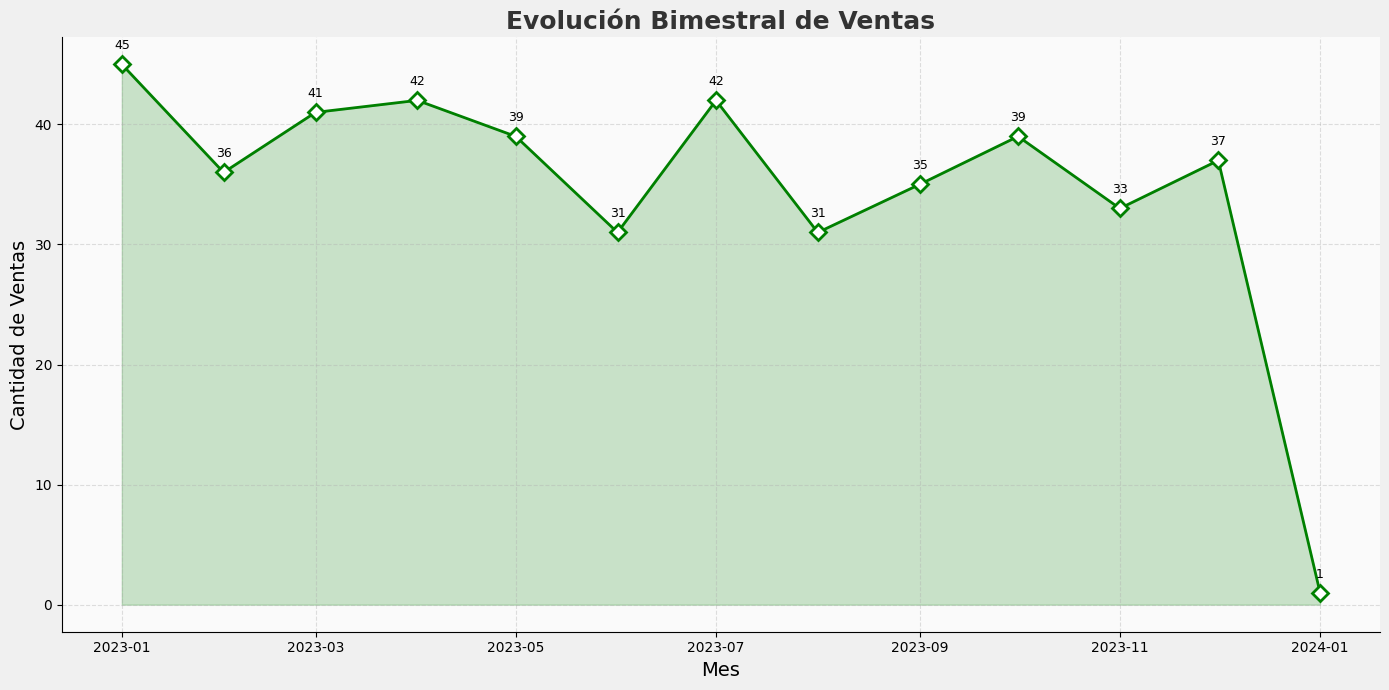

In [31]:
# Asegurate de convertir la columna a datetime
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

# Agrupar por mes
ventas_mensuales = df['fecha_venta'].dt.to_period('M').value_counts().sort_index()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

# Crear figura
plt.figure(figsize=(14, 7))

# Datos
x = ventas_mensuales.index
y = ventas_mensuales.values

# Línea principal
plt.plot(x, y, marker='D', linestyle='-', linewidth=2, color='green', markersize=8,
         markerfacecolor='white', markeredgewidth=2, label='Ventas')

# Gradiente (relleno debajo de la línea)
plt.fill_between(x, y, color='green', alpha=0.2)

# Etiquetas de cada punto
for i, value in enumerate(y):
    plt.text(x[i], value + 1, str(value), ha='center', va='bottom', fontsize=9, color='black')

# Estética
plt.title('Evolución Bimestral de Ventas', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Ventas', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)

# Fondo suave
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('#F0F0F0')

# Quitar bordes innecesarios
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Mostrar
plt.tight_layout()
plt.show()


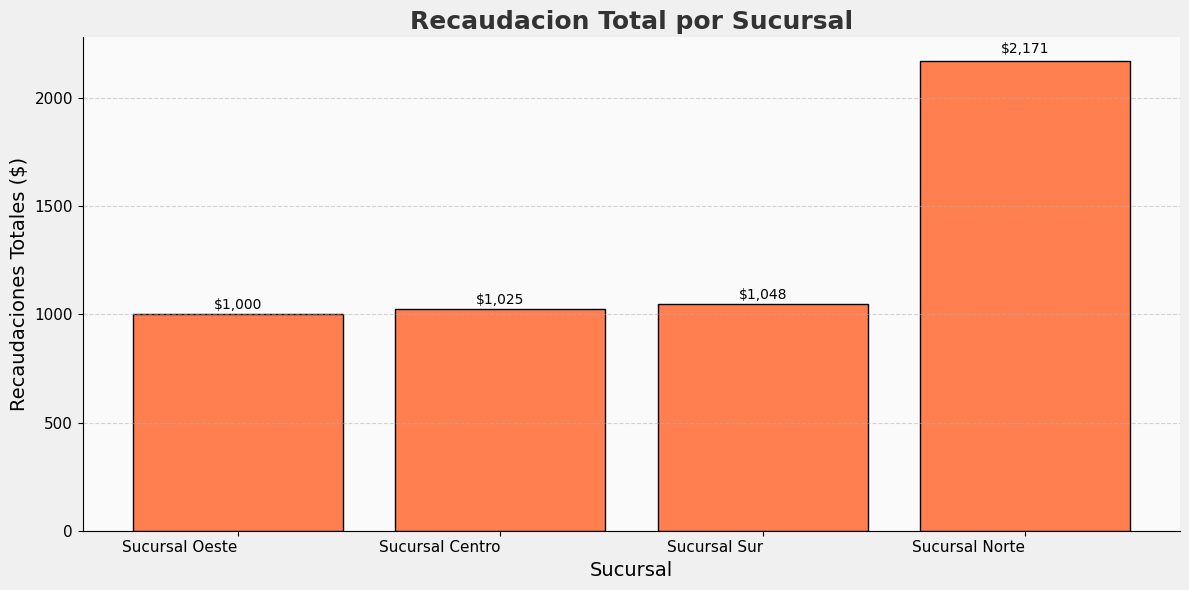

In [40]:
# Agrupación por sucursal
sucursal_totales = df.groupby("sucursal")["precio_total"].sum().sort_values()

# Crear figura
plt.figure(figsize=(12, 6))
bars = plt.bar(sucursal_totales.index, sucursal_totales.values, color="coral", edgecolor='black', linewidth=1)

# Título y ejes
plt.title("Recaudacion Total por Sucursal", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Sucursal", fontsize=14)
plt.ylabel("Recaudaciones Totales ($)", fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Etiquetas arriba de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f"${yval:,.0f}", 
             ha='center', va='bottom', fontsize=10, color='black')

# Fondo y estilo
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('#F0F0F0')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Quitar bordes innecesarios
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Ajuste final
plt.tight_layout()
plt.show()

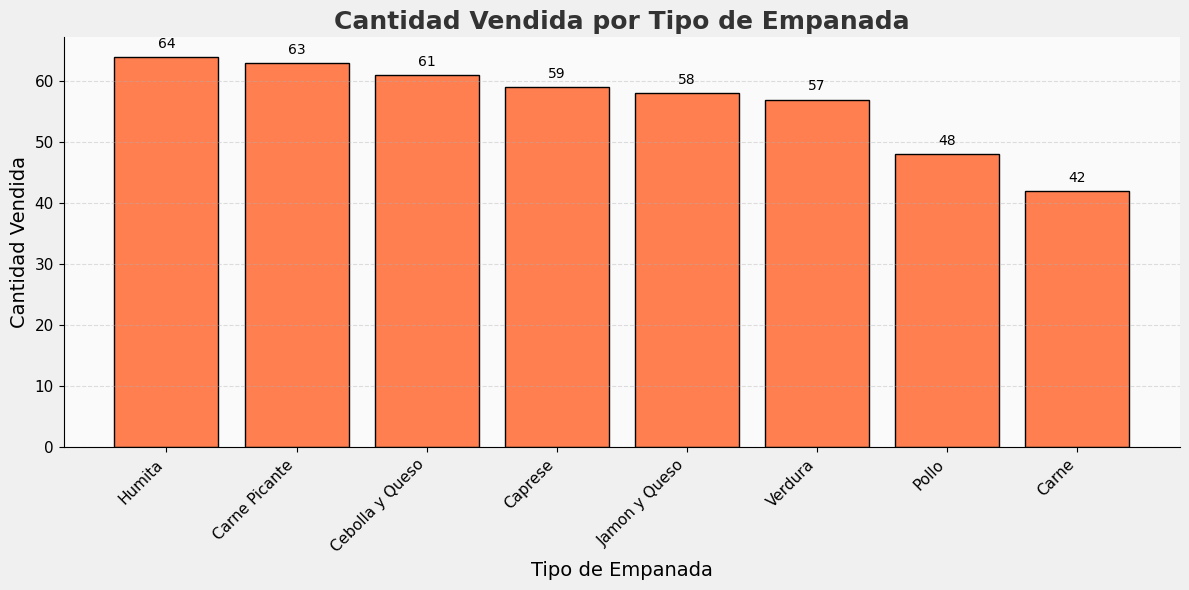

In [33]:

tipo_counts = df["tipo_empanada"].value_counts()

# Estilo de color de Seaborn
colors = sns.color_palette("Set2", len(tipo_counts))

# Crear gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(tipo_counts.index, tipo_counts.values, color="coral", edgecolor='black')

# Título y ejes
plt.title("Cantidad Vendida por Tipo de Empanada", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Tipo de Empanada", fontsize=14)
plt.ylabel("Cantidad Vendida", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval}", 
             ha='center', va='bottom', fontsize=10, color='black')

# Estética del fondo
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('#F0F0F0')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Quitar bordes innecesarios
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Ajuste final
plt.tight_layout()
plt.show()


In [34]:
df["metodo_compra"].value_counts()

metodo_compra
Presencial    159
Delivery      154
Web           139
Name: count, dtype: int64

Text(0.5, 1.0, 'Relacion(?)')

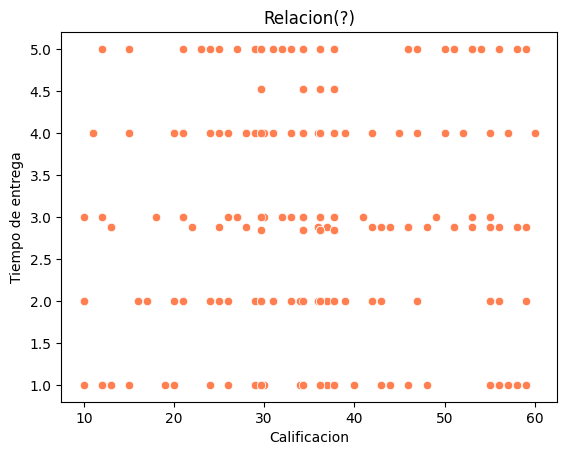

In [35]:
sns.scatterplot(data=df,x="tiempo_entrega_min",y="calificacion",c="coral")
plt.xlabel("Calificacion")
plt.ylabel("Tiempo de entrega")
plt.title("Relacion(?)")

In [36]:
df.to_csv("empanadas_don_pedro_limpio.csv", index=False)
df=pd.read_csv("empanadas_don_pedro_limpio.csv")

In [37]:
df.groupby("sucursal")["calificacion"].mean()

sucursal
Sucursal Centro    3.181368
Sucursal Norte     3.443290
Sucursal Oeste     3.712417
Sucursal Sur       3.494627
Name: calificacion, dtype: float64

In [41]:
df.groupby("sucursal")["calificacion"].max()

sucursal
Sucursal Centro    5.0
Sucursal Norte     5.0
Sucursal Oeste     5.0
Sucursal Sur       5.0
Name: calificacion, dtype: float64

In [42]:
df.groupby("sucursal")["calificacion"].min()

sucursal
Sucursal Centro    1.0
Sucursal Norte     1.0
Sucursal Oeste     1.0
Sucursal Sur       1.0
Name: calificacion, dtype: float64

In [38]:
df.groupby("sucursal")["tiempo_entrega_min"].mean()

sucursal
Sucursal Centro    29.511501
Sucursal Norte     36.081375
Sucursal Oeste     34.140805
Sucursal Sur       38.007421
Name: tiempo_entrega_min, dtype: float64

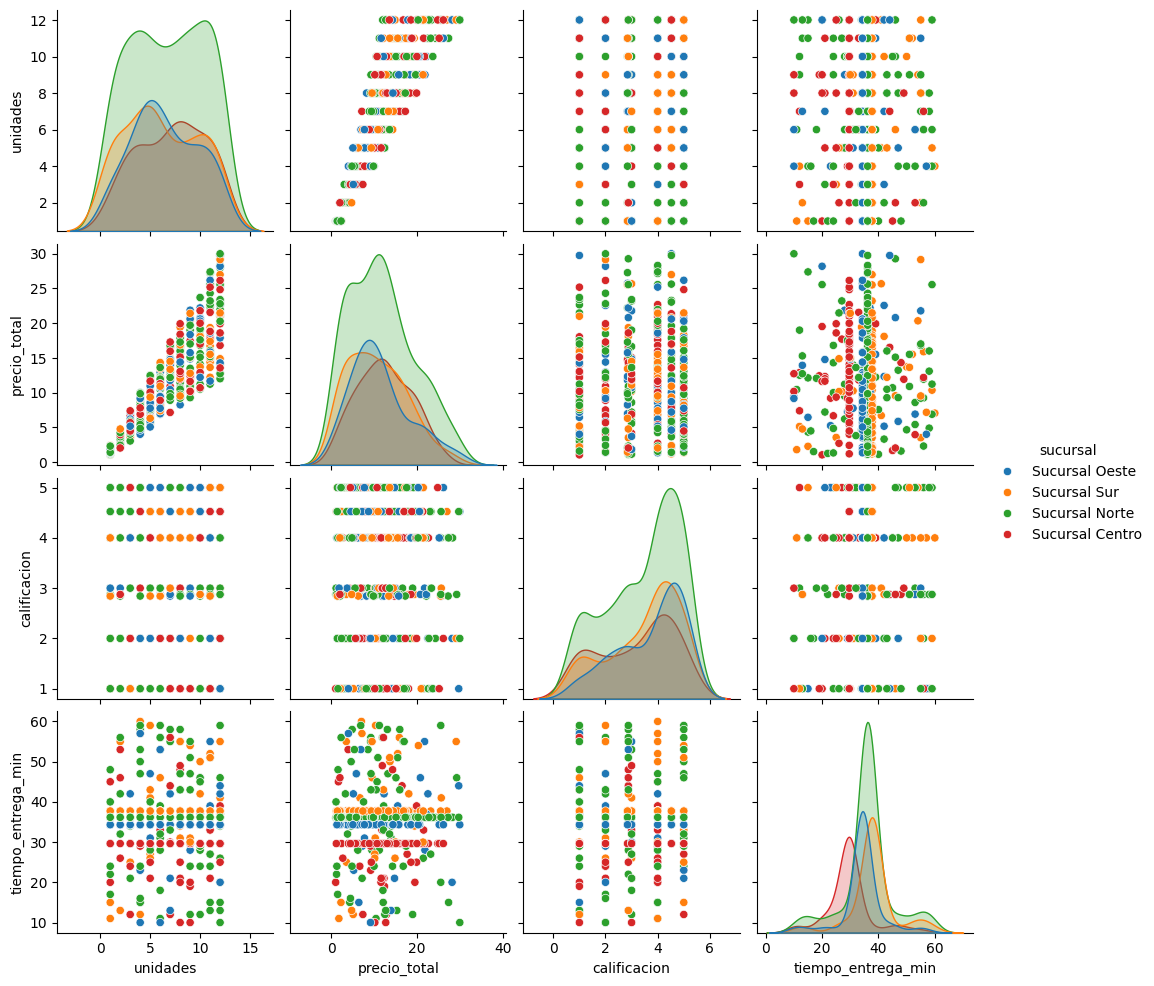

In [39]:
sns.pairplot(data=df,hue="sucursal")


### Preprocesamiento e Implementacion de modelo

In [24]:
## Objetivo = Prediccion de unidades totales vendidas
## Modelo = Random Forest Regressor


In [48]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
catecols = ["tipo_empanada","sucursal","medio_pago","cliente","metodo_compra"] 

In [79]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[catecols])

In [80]:
columnas_nuevas = encoder.get_feature_names_out(catecols)
df_encoded = pd.DataFrame(encoded, columns=columnas_nuevas)

In [81]:
df_encoded.head()

,tipo_empanada_Caprese,tipo_empanada_Carne,tipo_empanada_Carne Picante,tipo_empanada_Cebolla y Queso,tipo_empanada_Dulce de Leche,tipo_empanada_Humita,tipo_empanada_Jamon y Queso,tipo_empanada_Pollo,tipo_empanada_Verdura,sucursal_Sucursal Centro,sucursal_Sucursal Norte,sucursal_Sucursal Oeste,sucursal_Sucursal Palermo,sucursal_Sucursal Sur,medio_pago_Efectivo,medio_pago_MercadoPago,medio_pago_Tarjeta Crédito,medio_pago_Tarjeta Débito,cliente_Habitual,cliente_Nuevo,metodo_compra_Delivery,metodo_compra_Presencial,metodo_compra_Web
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [101]:
df = pd.concat([df.drop(catecols, axis=1), df_encoded], axis=1)


In [102]:
df.head()

,unidades,precio_total,calificacion,tiempo_entrega_min,tipo_empanada_Caprese,tipo_empanada_Carne,tipo_empanada_Carne Picante,tipo_empanada_Cebolla y Queso,tipo_empanada_Dulce de Leche,tipo_empanada_Humita,tipo_empanada_Jamon y Queso,tipo_empanada_Pollo,tipo_empanada_Verdura,sucursal_Sucursal Centro,sucursal_Sucursal Norte,sucursal_Sucursal Oeste,sucursal_Sucursal Palermo,sucursal_Sucursal Sur,medio_pago_Efectivo,medio_pago_MercadoPago,medio_pago_Tarjeta Crédito,medio_pago_Tarjeta Débito,cliente_Habitual,cliente_Nuevo,metodo_compra_Delivery,metodo_compra_Presencial,metodo_compra_Web
0,5,11.80,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,11,19.36,NaN,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2,2.26,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,7,12.32,2.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,6,12.96,2.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_modelo1 = df.drop(columns=["fecha_venta"])

In [104]:
X = df_modelo1.drop("unidades", axis=1)
y = df_modelo1["unidades"]

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

RMSE: 1.575590048204164
R²: 0.7774973783510052


C:\Users\peria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


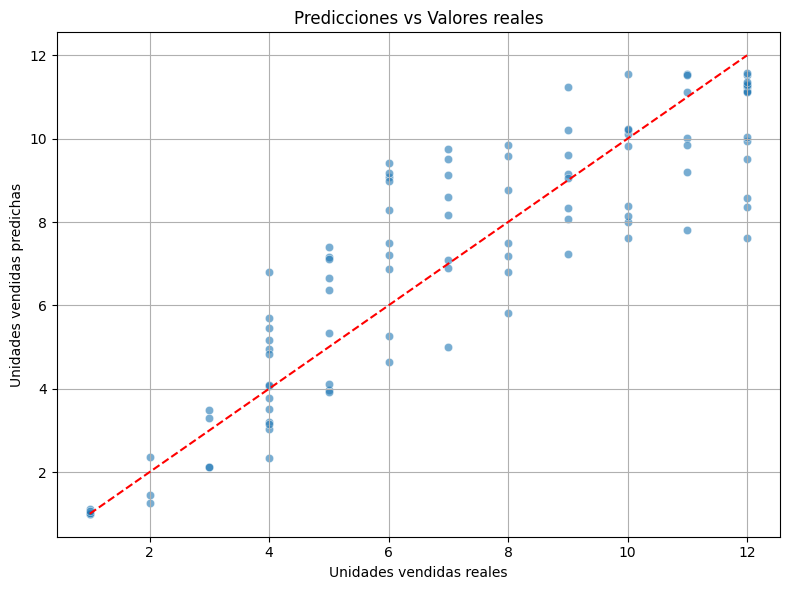

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Unidades vendidas reales")
plt.ylabel("Unidades vendidas predichas")
plt.title("Predicciones vs Valores reales")
plt.grid(True)
plt.tight_layout()
plt.show()
